# <strong style="font-size:40px"> Walkthrough - Valuación de inmuebles en un sistema de búsqueda online - ECI 2018 - Navent </strong>

<span style="color:red">Creen la carpeta data/ y pongan ahí los archivos `train.csv` y `test.csv` para que la notebook funcione!</span>

# Agenda:
* Análisis exploratorio básico
* Presentación de tres modelos súper simples.
* Código para hacer un submit real

# Análisis exploratorio

El dataset son propiedades en `venta` en México entre `2012` y `2016`, valuadas en `pesos mexicanos`. El csv de train tiene `240K` filas y `22` columnas. El csv de test tiene `60K` filas (y 21 columnas). La columna a predecir es `precio`.

In [1]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

## General

In [2]:
# Cargamos el dataframe
df = pd.read_csv('datos/train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
print(f"Shape: {df.shape}")
print(f"Columnas: {df.columns}")
df.head()

Shape: (240000, 22)
Columnas: Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')


titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia  antiguedad  habitaciones  garages  banos  \
id                                                                   
254099  Distrito Federal         nan          2.00     1.00   2.00   
53461   Distrito Federal       10.00          3.00     2.00   2.00   
247984           Jalisco        5.00          3.00     2.00   2.00   
209067    Edo. de México        1.00          2.00     1.00   1.00   
185997           Jalisco       10.00          2.00     1.00   1.00   

        metroscubiertos  metrostotales   idzona   lat    lng      fecha  \
id                                                                        
254099            80.00          80.00 23533.00   nan    nan 2015-08-23   
53461            268.00         180.00 24514.00 19.31 -99.23 2013-06-28   
247984           144.00         166.00 48551.00   nan    nan 2015-10-17   
209067            63.00          67.00 53666.00 19.30 -99.69 2012-03-09   
185997            95.00          95.00 47835.00   nan    nan 2016-06-07   

        gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                           
254099      0.00           0.00     0.00              0.00   
53461       0.00           0.00     0.00              1.00   
247984      0.00           0.00     0.00              0.00   
209067      0.00           0.00     0.00              1.00   
185997      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  
id                                             
254099                        0.00 2273000.00  
53461                         1.00 3600000.00  
247984                        0.00 1200000.00  
209067                        1.00  650000.00  
185997                        0.00 1150000.00

In [63]:
df['desc_len'] = df['descripcion'].map(str).apply(len)
df['desc_len_norm'] = np.log(df['desc_len'])
#print(df['ldesc'].sort_values(ascending=False)[:5],'\n')
#len(df2.iloc(0)[0])
df.head()

titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia  antiguedad  habitaciones  garages  banos  \
id                                                                   
254099  Distrito Federal         nan          2.00     1.00   2.00   
53461   Distrito Federal       10.00          3.00     2.00   2.00   
247984           Jalisco        5.00          3.00     2.00   2.00   
209067    Edo. de México        1.00          2.00     1.00   1.00   
185997           Jalisco       10.00          2.00     1.00   1.00   

        metroscubiertos  metrostotales   idzona   lat    lng      fecha  \
id                                                                        
254099            80.00          80.00 23533.00   nan    nan 2015-08-23   
53461            268.00         180.00 24514.00 19.31 -99.23 2013-06-28   
247984           144.00         166.00 48551.00   nan    nan 2015-10-17   
209067            63.00          67.00 53666.00 19.30 -99.69 2012-03-09   
185997            95.00          95.00 47835.00   nan    nan 2016-06-07   

        gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                           
254099      0.00           0.00     0.00              0.00   
53461       0.00           0.00     0.00              1.00   
247984      0.00           0.00     0.00              0.00   
209067      0.00           0.00     0.00              1.00   
185997      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  precio_norm  desc_len  \
id                                                                     
254099                        0.00 2273000.00        14.64       171   
53461                         1.00 3600000.00        15.10       716   
247984                        0.00 1200000.00        14.00      1340   
209067                        1.00  650000.00        13.38       357   
185997                        0.00 1150000.00        13.96       103   

        desc_len_norm  
id                     
254099           5.14  
53461            6.57  
247984           7.20  
209067           5.88  
185997           4.63

| Columnas de texto | Tipo | Comentarios | 
|:-|:-|:- | 
|`titulo`| Texto | El título de la propiedad publicada |
|`descripcion`| Texto | La descripción de la propieadad publicada |

| Localización | Tipo | Comentarios | 
|:-|:-|:- | 
|`direccion` | String | La dirección (calle y número) de la propiedad |
|`ciudad`| String |  La ciudad de la propiedad |
|`idzona`| Int |  Una zona es una parte de un ciudad |
|`provincia`| String  | La provincia donde está localizada la propiedad|
|`lat`| Float | Latitud |
|`lng`| Float | Longitud|

| Cualidad | Tipo | Comentarios | 
|:-|:-|:- | 
| `tipodepropiedad` | Categórico (String) | Casa, apartamento, terreno, etc|
| `metrostotales` | Int | Metros totales de la propiedad | 
| `metroscubiertos` | Int | Metros cubiertos de la propiedad |
| `antiguedad` | Int | Antigüedad de la propiedad |
| `habitaciones` | Int | Cantidad de habitaciones |
| `garages` | Int | Cantidad de garages |
| `banos` | Int | Cantidad de baños|

| Fecha/Amenities/Otros | Tipo | Comentarios | 
|:-|:-|:- | 
| `fecha` | Date | Fecha de publicación |
| `gimnasio` |  Bool | Si el edificio o la propiedad tiene un gimnasio |
| `usosmultiples` |  Bool |Si el edificio o la propiedad tiene un SUM |
| `piscina` |  Bool | Si el edificio o la propiedad tiene un piscina |
| `escuelascercanas` |  Bool |Si la propiedad tiene escuelas cerca |
| `centroscomercialescercanos` | Bool | Si la propiedad tiene centros comerciales cerca |

| Variable dependiente | Tipo | Comentarios | 
|:-|:-|:- | 
| `precio` | Float | Valor de publicación de la propiedad en pesos mexicanos |

## Datos faltantes

El dataset está tomado directamente de la página y tiene muchos datos faltantes o mal cargados. Lo curamos un poco, pero sigue teniendo mucho ruido. Por ejemplo, latitud y longitud solo están presentes en el 48% de los datos, dirección y metros totales faltan para el ~20%, etc. Además de los nulls, pueden encontrar cosas sin sentido que responden a cargas negligentes de los datos.

In [5]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

nulls  porcentaje
precio                           0        0.00
escuelascercanas                 0        0.00
piscina                          0        0.00
usosmultiples                    0        0.00
gimnasio                         0        0.00
fecha                            0        0.00
centroscomercialescercanos       0        0.00
tipodepropiedad                 46        0.02
provincia                      155        0.06
ciudad                         372        0.16
descripcion                   1619        0.67
titulo                        5387        2.24
metroscubiertos              17400        7.25
habitaciones                 22471        9.36
banos                        26221       10.93
idzona                       28621       11.93
garages                      37765       15.74
antiguedad                   43555       18.15
metrostotales                51467       21.44
direccion                    53072       22.11
lat                         123488       51.45
lng                         123488       51.45

## Precio

El precio tiene una distribución asimétrica positiva (a izquierda) con long-tail. A modo heurístico, la tasa USD2MXN hoy es de ~20. O sea que 2.000.000 MXN serían 100.000 USD y 12.000.000 MXN, 600.000 USD.

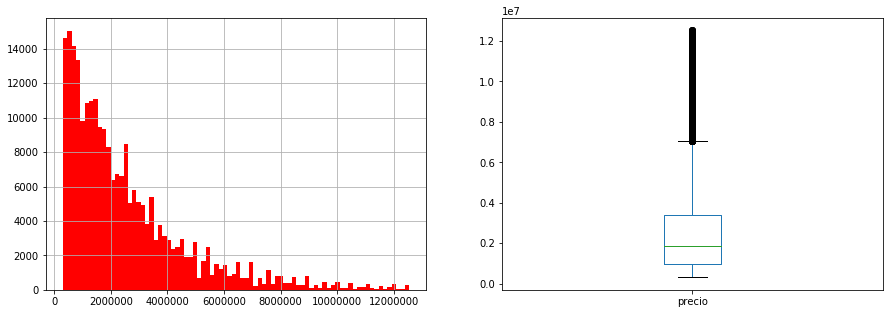

In [8]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].ticklabel_format(style = 'plain')
df['precio'].hist(bins=80, ax=axes[0], color='r'); 
#np.log(df['precio']).hist(bins=80, ax=axes[0], color='g'); 
df['precio'].plot(kind='box', ax=axes[1]);
plt.show()

In [4]:
df['precio_norm'] = np.log(df['precio'])
df.head()

titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia  antiguedad  habitaciones  garages  banos  \
id                                                                   
254099  Distrito Federal         nan          2.00     1.00   2.00   
53461   Distrito Federal       10.00          3.00     2.00   2.00   
247984           Jalisco        5.00          3.00     2.00   2.00   
209067    Edo. de México        1.00          2.00     1.00   1.00   
185997           Jalisco       10.00          2.00     1.00   1.00   

        metroscubiertos  metrostotales   idzona   lat    lng      fecha  \
id                                                                        
254099            80.00          80.00 23533.00   nan    nan 2015-08-23   
53461            268.00         180.00 24514.00 19.31 -99.23 2013-06-28   
247984           144.00         166.00 48551.00   nan    nan 2015-10-17   
209067            63.00          67.00 53666.00 19.30 -99.69 2012-03-09   
185997            95.00          95.00 47835.00   nan    nan 2016-06-07   

        gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                           
254099      0.00           0.00     0.00              0.00   
53461       0.00           0.00     0.00              1.00   
247984      0.00           0.00     0.00              0.00   
209067      0.00           0.00     0.00              1.00   
185997      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  precio_norm  
id                                                          
254099                        0.00 2273000.00        14.64  
53461                         1.00 3600000.00        15.10  
247984                        0.00 1200000.00        14.00  
209067                        1.00  650000.00        13.38  
185997                        0.00 1150000.00        13.96

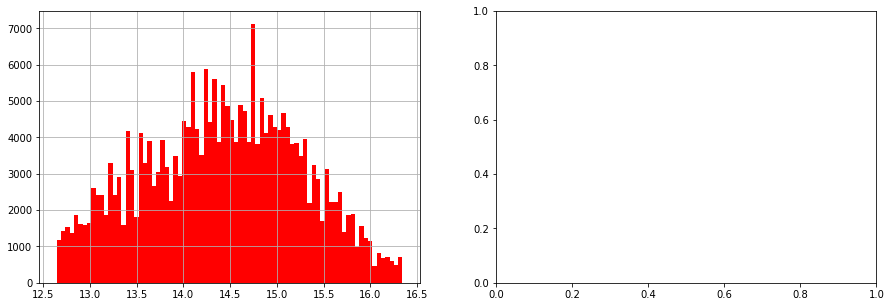

In [6]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].ticklabel_format(style = 'plain')
df['precio_norm'].hist(bins=80, ax=axes[0], color='r'); 
plt.show()

In [64]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

categoricals = df.select_dtypes(exclude=[np.number])
print(categoricals.dtypes)
categoricals.describe()

titulo                     object
descripcion                object
tipodepropiedad            object
direccion                  object
ciudad                     object
provincia                  object
fecha              datetime64[ns]
dtype: object


titulo                                        descripcion  \
count          234613                                             238381   
unique         186191                                             232187   
top     casa en venta  empresa dedicada a los   ante notario y regist...   
freq              468                                                119   
first             NaN                                                NaN   
last              NaN                                                NaN   

       tipodepropiedad direccion     ciudad         provincia  \
count           239954    186928     239628            239845   
unique              24    140269        875                32   
top               Casa         -  Querétaro  Distrito Federal   
freq            141717       660      12646             58790   
first              NaN       NaN        NaN               NaN   
last               NaN       NaN        NaN               NaN   

                      fecha  
count                240000  
unique                 1830  
top     2016-12-03 00:00:00  
freq                   1416  
first   2012-01-01 00:00:00  
last    2016-12-31 00:00:00

In [9]:
categoricals.head()

titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia      fecha  
id                                   
254099  Distrito Federal 2015-08-23  
53461   Distrito Federal 2013-06-28  
247984           Jalisco 2015-10-17  
209067    Edo. de México 2012-03-09  
185997           Jalisco 2016-06-07

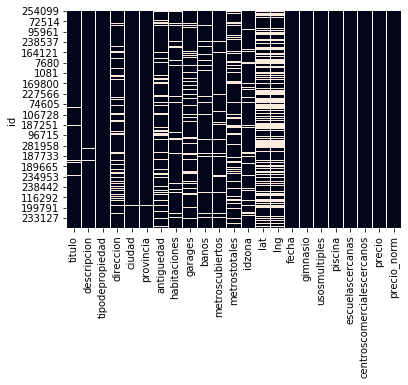

In [11]:
sns.heatmap(df.isnull(), cbar=False)

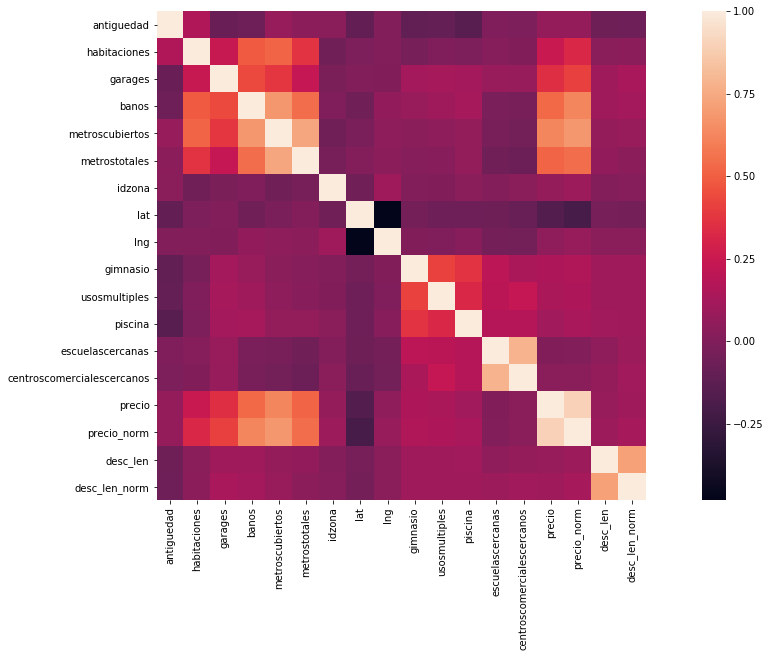

In [65]:
corr = numeric_features.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True)

In [60]:
print(corr['precio_norm'].sort_values(ascending=False)[:5],'\n')

precio_norm       1.00
precio            0.90
metroscubiertos   0.69
banos             0.63
metrostotales     0.55
Name: precio_norm, dtype: float64 



In [88]:
df['prom_ciudad'] = df.groupby()

antiguedad  habitaciones   garages     banos  metroscubiertos  \
count   196445.00     217529.00 202235.00 213779.00        222600.00   
mean         8.12          2.90      1.55      2.13           174.02   
std          9.55          0.90      0.85      0.91            98.15   
min          0.00          1.00      0.00      1.00            15.00   
25%          0.00          2.00      1.00      1.00            90.00   
50%          5.00          3.00      2.00      2.00           153.00   
75%         10.00          3.00      2.00      3.00           240.00   
max         80.00         10.00      3.00      4.00           439.00   

       metrostotales      idzona       lat       lng  gimnasio  usosmultiples  \
count      188533.00   211379.00 116512.00 116512.00 240000.00      240000.00   
mean          176.77  2423467.82     20.70    -99.51      0.06           0.06   
std            94.43 10567938.36      3.14      9.74      0.24           0.23   
min            15.00       22.00   -100.89   -125.86      0.00           0.00   
25%           102.00    24890.00     19.36   -100.98      0.00           0.00   
50%           155.00    56383.00     19.54    -99.24      0.00           0.00   
75%           238.00    87838.00     20.74    -99.13      0.00           0.00   
max           439.00 50003999.00     83.03    121.04      1.00           1.00   

        piscina  escuelascercanas  centroscomercialescercanos      precio  \
count 240000.00         240000.00                   240000.00   240000.00   
mean       0.09              0.44                        0.40  2530838.35   
std        0.28              0.50                        0.49  2152551.80   
min        0.00              0.00                        0.00   310000.00   
25%        0.00              0.00                        0.00   952772.50   
50%        0.00              0.00                        0.00  1850000.00   
75%        0.00              1.00                        1.00  3390000.00   
max        1.00              1.00                        1.00 12525000.00   

       precio_norm  desc_len  desc_len_norm  
count    240000.00 240000.00      240000.00  
mean         14.41    414.86           5.73  
std           0.84    381.81           0.85  
min          12.64      1.00           0.00  
25%          13.77    204.00           5.32  
50%          14.43    336.00           5.82  
75%          15.04    506.00           6.23  
max          16.34  43997.00          10.69

In [92]:
df.head()

titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia  antiguedad  habitaciones  garages  banos  \
id                                                                   
254099  Distrito Federal         nan          2.00     1.00   2.00   
53461   Distrito Federal       10.00          3.00     2.00   2.00   
247984           Jalisco        5.00          3.00     2.00   2.00   
209067    Edo. de México        1.00          2.00     1.00   1.00   
185997           Jalisco       10.00          2.00     1.00   1.00   

        metroscubiertos  metrostotales   idzona   lat    lng      fecha  \
id                                                                        
254099            80.00          80.00 23533.00   nan    nan 2015-08-23   
53461            268.00         180.00 24514.00 19.31 -99.23 2013-06-28   
247984           144.00         166.00 48551.00   nan    nan 2015-10-17   
209067            63.00          67.00 53666.00 19.30 -99.69 2012-03-09   
185997            95.00          95.00 47835.00   nan    nan 2016-06-07   

        gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                           
254099      0.00           0.00     0.00              0.00   
53461       0.00           0.00     0.00              1.00   
247984      0.00           0.00     0.00              0.00   
209067      0.00           0.00     0.00              1.00   
185997      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  precio_norm  desc_len  \
id                                                                     
254099                        0.00 2273000.00        14.64       171   
53461                         1.00 3600000.00        15.10       716   
247984                        0.00 1200000.00        14.00      1340   
209067                        1.00  650000.00        13.38       357   
185997                        0.00 1150000.00        13.96       103   

        desc_len_norm  
id                     
254099           5.14  
53461            6.57  
247984           7.20  
209067           5.88  
185997           4.63

In [94]:
df.head()

titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia  antiguedad  habitaciones  garages  banos  \
id                                                                   
254099  Distrito Federal         nan          2.00     1.00   2.00   
53461   Distrito Federal       10.00          3.00     2.00   2.00   
247984           Jalisco        5.00          3.00     2.00   2.00   
209067    Edo. de México        1.00          2.00     1.00   1.00   
185997           Jalisco       10.00          2.00     1.00   1.00   

        metroscubiertos  metrostotales   idzona   lat    lng      fecha  \
id                                                                        
254099            80.00          80.00 23533.00   nan    nan 2015-08-23   
53461            268.00         180.00 24514.00 19.31 -99.23 2013-06-28   
247984           144.00         166.00 48551.00   nan    nan 2015-10-17   
209067            63.00          67.00 53666.00 19.30 -99.69 2012-03-09   
185997            95.00          95.00 47835.00   nan    nan 2016-06-07   

        gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                           
254099      0.00           0.00     0.00              0.00   
53461       0.00           0.00     0.00              1.00   
247984      0.00           0.00     0.00              0.00   
209067      0.00           0.00     0.00              1.00   
185997      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  precio_norm  desc_len  \
id                                                                     
254099                        0.00 2273000.00        14.64       171   
53461                         1.00 3600000.00        15.10       716   
247984                        0.00 1200000.00        14.00      1340   
209067                        1.00  650000.00        13.38       357   
185997                        0.00 1150000.00        13.96       103   

        desc_len_norm  year  
id                           
254099           5.14  2015  
53461            6.57  2013  
247984           7.20  2015  
209067           5.88  2012  
185997           4.63  2016

In [100]:
#df['anio'] = df.fecha.dt.year
df_ord = df.groupby(['ciudad', 'year']).agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)
print(df_ord[:10],'\n')

print(df_ord.sort_values('precio', ascending=True)[:10],'\n')

                                  precio
ciudad                  year            
Quitupan                2016 12500000.00
Colón                   2013 12500000.00
Otumba                  2016 12500000.00
Gral. Treviño           2015 12000000.00
Batopilas               2012 12000000.00
ácatlán de Juárez       2015 10651400.00
Ameca                   2016 10010000.00
Soyaniquilpan de Juárez 2016 10000000.00
Contepec                2014 10000000.00
Dzidzantún              2016  9500000.00 

                                precio
ciudad                  year          
Jiquilpan               2012 310000.00
Cuaxomulco              2014 310000.00
Yauhquemecan            2013 310000.00
Ecatzingo               2013 310000.00
Tecamachalco            2015 310000.00
Ojinaga                 2016 311300.00
Asientos                2012 312423.00
Santa Isabel Xiloxoxtla 2013 313200.00
Santiago Papasquiaro    2012 313200.00
Moroleón                2015 313900.00 



Text(0, 0.5, 'Nombre de categoria')

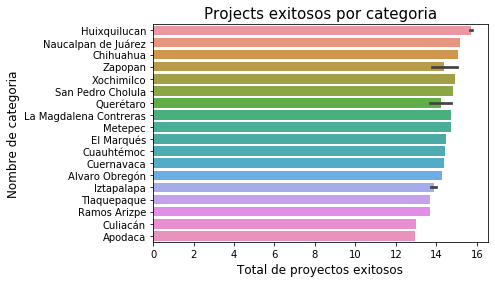

In [83]:

df_sample = df.sample(frac=0.0005).copy().dropna().sort_values(column).sort_values('precio_norm', ascending=False)

g = sns.barplot(x= df_sample.precio_norm, y=df_sample.ciudad)
g.set_title("Projects exitosos por categoria", fontsize=15)
g.set_xlabel("Total de proyectos exitosos", fontsize=12)
g.set_ylabel("Nombre de categoria", fontsize=12)

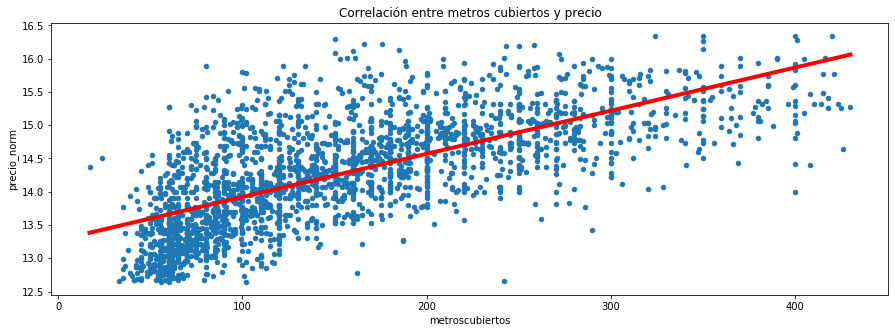

In [18]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio_norm', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio_norm']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);

In [ ]:
print(df['precio_norm'].sort_values(ascending=False)[:5],'\n')

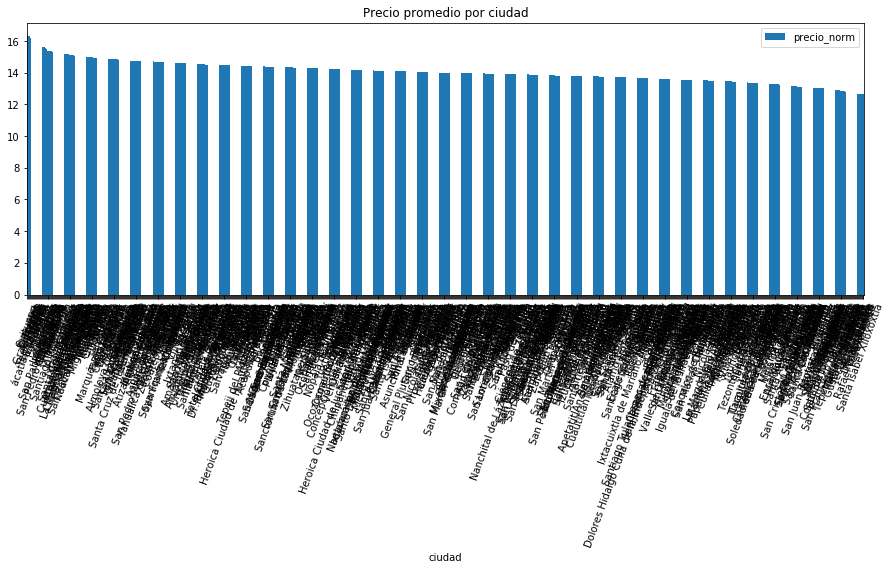

In [42]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'ciudad'
df.groupby('ciudad').agg({'precio_norm': 'mean'})\
    .sort_values('precio_norm', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por ciudad");

In [36]:
import os
import shapefile
from json import dumps


def shape2json(fname, outfile="municipios.json", country='Mexico'):
    # read the shapefile
    reader = shapefile.Reader(fname)
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]
    buffer = []
    for sr in reader.shapeRecords():
        atr = dict(zip(field_names, sr.record))
        geom = sr.shape.__geo_interface__
        buffer.append(dict(type="Feature", \
                           geometry=geom, properties=atr)) 
    geojson = open(outfile, "w")
    geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
    geojson.close()

shape = 'gadm36_MEX_0.shp'
#cartopy_cache = '.local/share/cartopy/shapefiles/natural_earth/cultural/'
cartopy_cache = 'Documents/dev/datos/DatosG29/datos/mapa'
#fname = os.path.join(os.path.expanduser('~'), cartopy_cache, shape)
fname = 'datos/mapa/gadm36_MEX_0.shp'
shape2json(fname, outfile="municipios.json", country='Mexico')

In [37]:
import folium
import numpy as np
from IPython.display import IFrame


def inline_map(m, width=650, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, width, height))
    return embed

bbox = [-82, -32, -45, 10]

lon_center, lat_center = np.array(bbox).reshape(2, 2).mean(axis=0)
mapa = folium.Map(width=650, height=500, zoom_start=4,
                  location=[-15, -50])

folium.GeoJson('municipios.json', name='municipios').add_to(mapa)

folium.LayerControl().add_to(mapa)


In [139]:
m = folium.Map(location=[20, -102], zoom_start=5)
 
# Add the color for the choropleth:
folium.LayerControl().add_to(m)

dftmp =df.dropna(subset=['lat', 'lng'])
dftmp2 = dftmp.sample(frac=0.05).copy()
dftmp2['marker_color'] = pd.cut(dftmp2['precio'], bins=4, labels=['yellow', 'green', 'blue', 'red'])


for index, row in dftmp2.iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lng],
        radius=15,
        popup='Laurelhurst Park',
        color='clear',
        fill=True,
        fill_color=row.marker_color,
        fill_opacity=0.2
    ).add_to(m)


# Guardar como html
m.save('out.html')
folium.LayerControl().add_to(m)
m

In [168]:

dftmp = df.groupby('ciudad').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)

#df_mexico = df_mexico.reset_index(level='city')
df_mexico['ciudad'] = df_mexico['city']
df_mexico = df_mexico.drop(columns=['city'])
df_mexico.head()
#pd.merge(dftmp, df_mexico, on='subject_id', how='left')
df_mexico[df_mexico.ciudad == 'Quitupan']

KeyError: 'city'

In [223]:
#dfc1 = df_mexico
#dfc1 = dfc1.append({'lat': -1, 'lng': 12, 'ciudad': "asdk"}, ignore_index=True)
dfc1 = dfc1.truncate(after=-1)
dfc1 = dfc1.append({'lat': parsed[0]['lat'], 'lng': parsed[0]['lon'], 'ciudad': ciudad}, ignore_index=True)

dfc1 = dfc1.truncate(after=-1)
dfc1.tail()

Empty DataFrame
Columns: [lat, lng, ciudad]
Index: []

In [263]:

dftmp3 = dftmp2[~dftmp2.ciudad.isin(dfc1.ciudad)]
#dftmp3.tail()
#dftmp3 = dftmp3[~dftmp3.duplicated(subset=None, keep='first')]
dftmp3.count()

ciudad        627
ciudad_uni    627
dtype: int64

In [264]:
import requests
import json
import time
#url = "http://open.mapquestapi.com/nominatim/v1/search.php?key=YFFOWlv9ynAHnvisIfqDcxZVhJgLzgOA&format=json&q=quitupan+mexico&addressdetails=0&limit=1"
print(dftmp3.count())
i = 0
for ciudad in dftmp3.ciudad:
    ciudad_uni = strip_accents(ciudad)
    url = "http://open.mapquestapi.com/nominatim/v1/search.php?key=YFFOWlv9ynAHnvisIfqDcxZVhJgLzgOA&format=json&q=" + ciudad_uni + "+mexico&addressdetails=0&limit=1"
    response = requests.request("GET", url)
    parsed = response.json()
    dfc1 = dfc1.append({'lat': parsed[0]['lat'], 'lng': parsed[0]['lon'], 'ciudad': ciudad}, ignore_index=True)
    time.sleep(0.4)
    i+=1
    print(ciudad_uni + " " + str(i))


#print first 4000 characters of response


ciudad        627
ciudad_uni    627
dtype: int64
Martinez de la Torre 1
Isidro Fabela 2
San Gregorio Atzompa 3
Santa Catarina 4
Calimaya 5
Atenco 6
Petatlan 7
Carmen 8
Tequila 9
Merida 10
Tequisquiapan 11
La Barca 12
Ocozocoautla de Espinosa 13
Meoqui 14
Dr. Belisario Dominguez 15
Chilapa de Alvarez 16
Homun 17
Huajicori 18
Pinotepa de Don Luis 19
Aquismon 20
Juarez Hidalgo 21
Tetela del Volcan 22
Teteles de Avila Castillo 23
Temascalapa 24
San Pedro Cholula 25
Tlaltizapan 26
acaxochitlan 27
Ruiz 28


ConnectionError: ('Connection aborted.', TimeoutError(10060, 'Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder', None, 10060, None))

In [266]:
dfc1.tail()
dfc1.to_csv(r'ciudades_posta.csv')

In [183]:
#dftmp2 = dftmp.reset_index(level='ciudad')
#dftmp2 = dftmp2.drop(columns=['precio'])
#dftmp2.to_csv(r'ciudades.csv')
dftmp2.duplicated(subset=None, keep='first')
dftmp2.count()
dftmp2.to_csv(r'ciudades.csv')


In [234]:
import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [235]:
#df_geo = pd.merge(dftmp, df_mexico, on='ciudad', how='left')

df_geo.head()
dftmp3 = dftmp2

dftmp3['ciudad_uni'] = dftmp3['ciudad'].map(str).apply(strip_accents)

dftmp3.head()

ciudad         ciudad_uni
0           Quitupan           Quitupan
1      Gral. Treviño      Gral. Trevino
2          Batopilas          Batopilas
3  ácatlán de Juárez  acatlan de Juarez
4           Contepec           Contepec

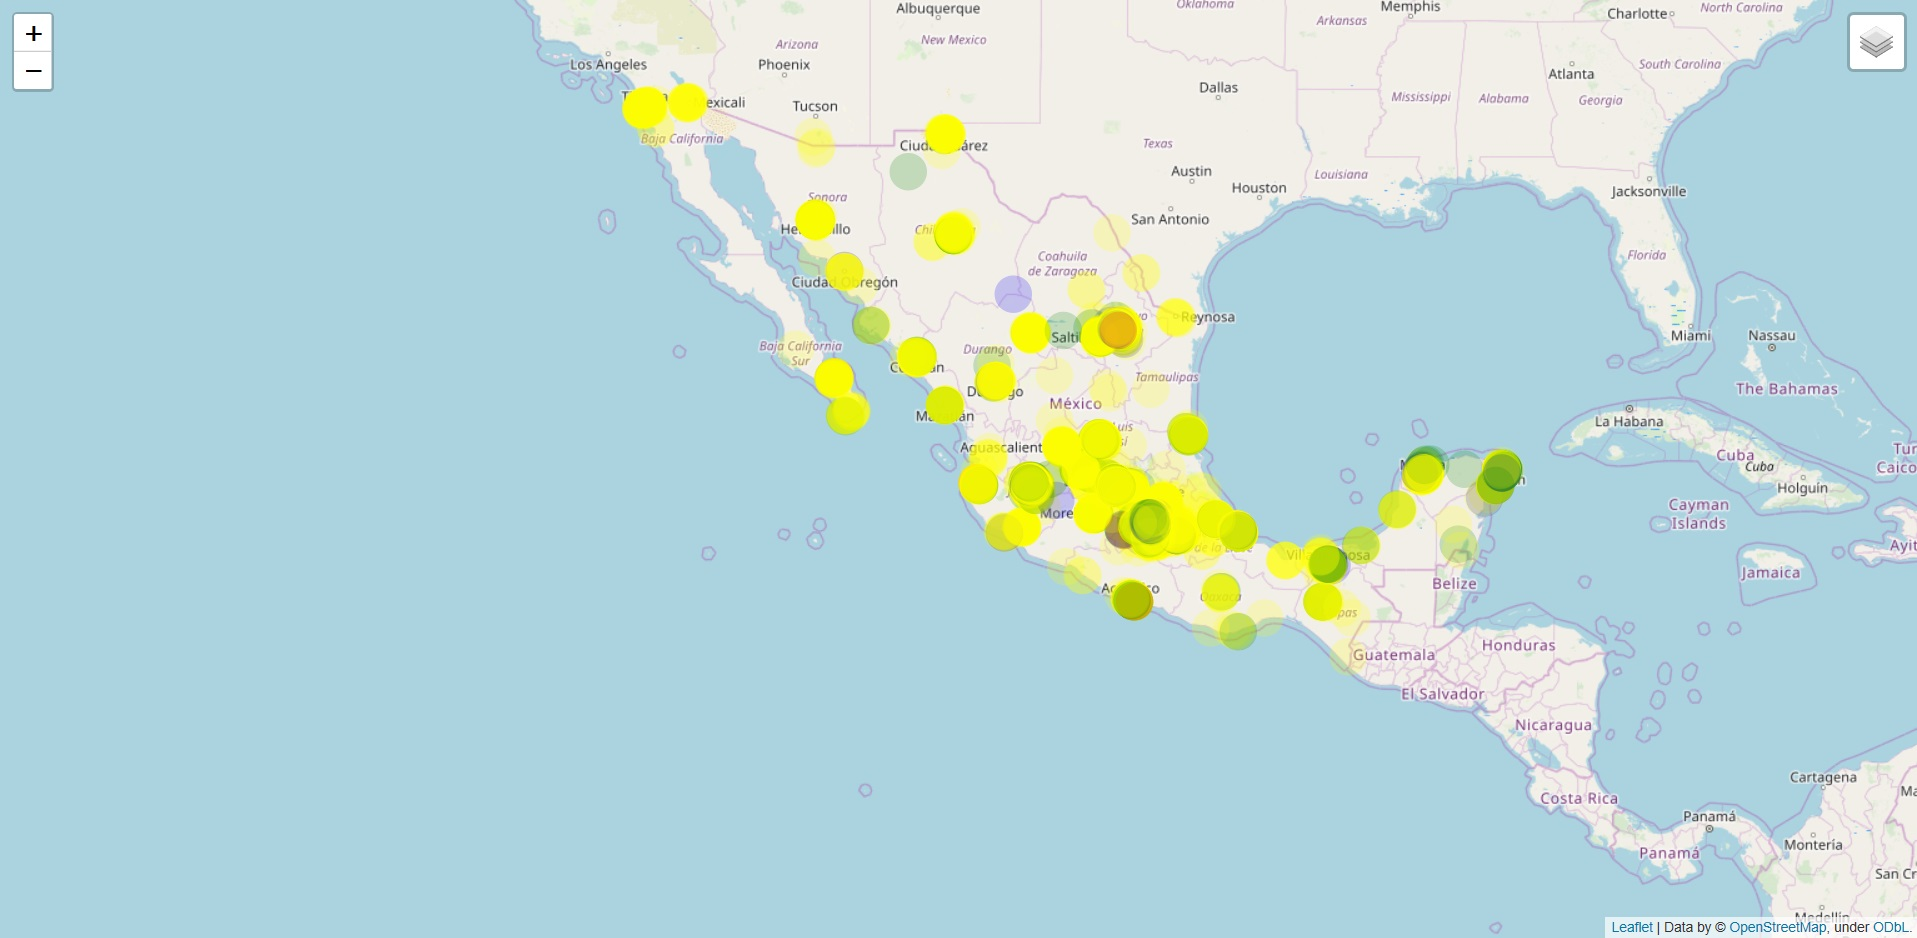

In [199]:
from IPython.display import Image

Image(filename = "img/mapa2.jpg")

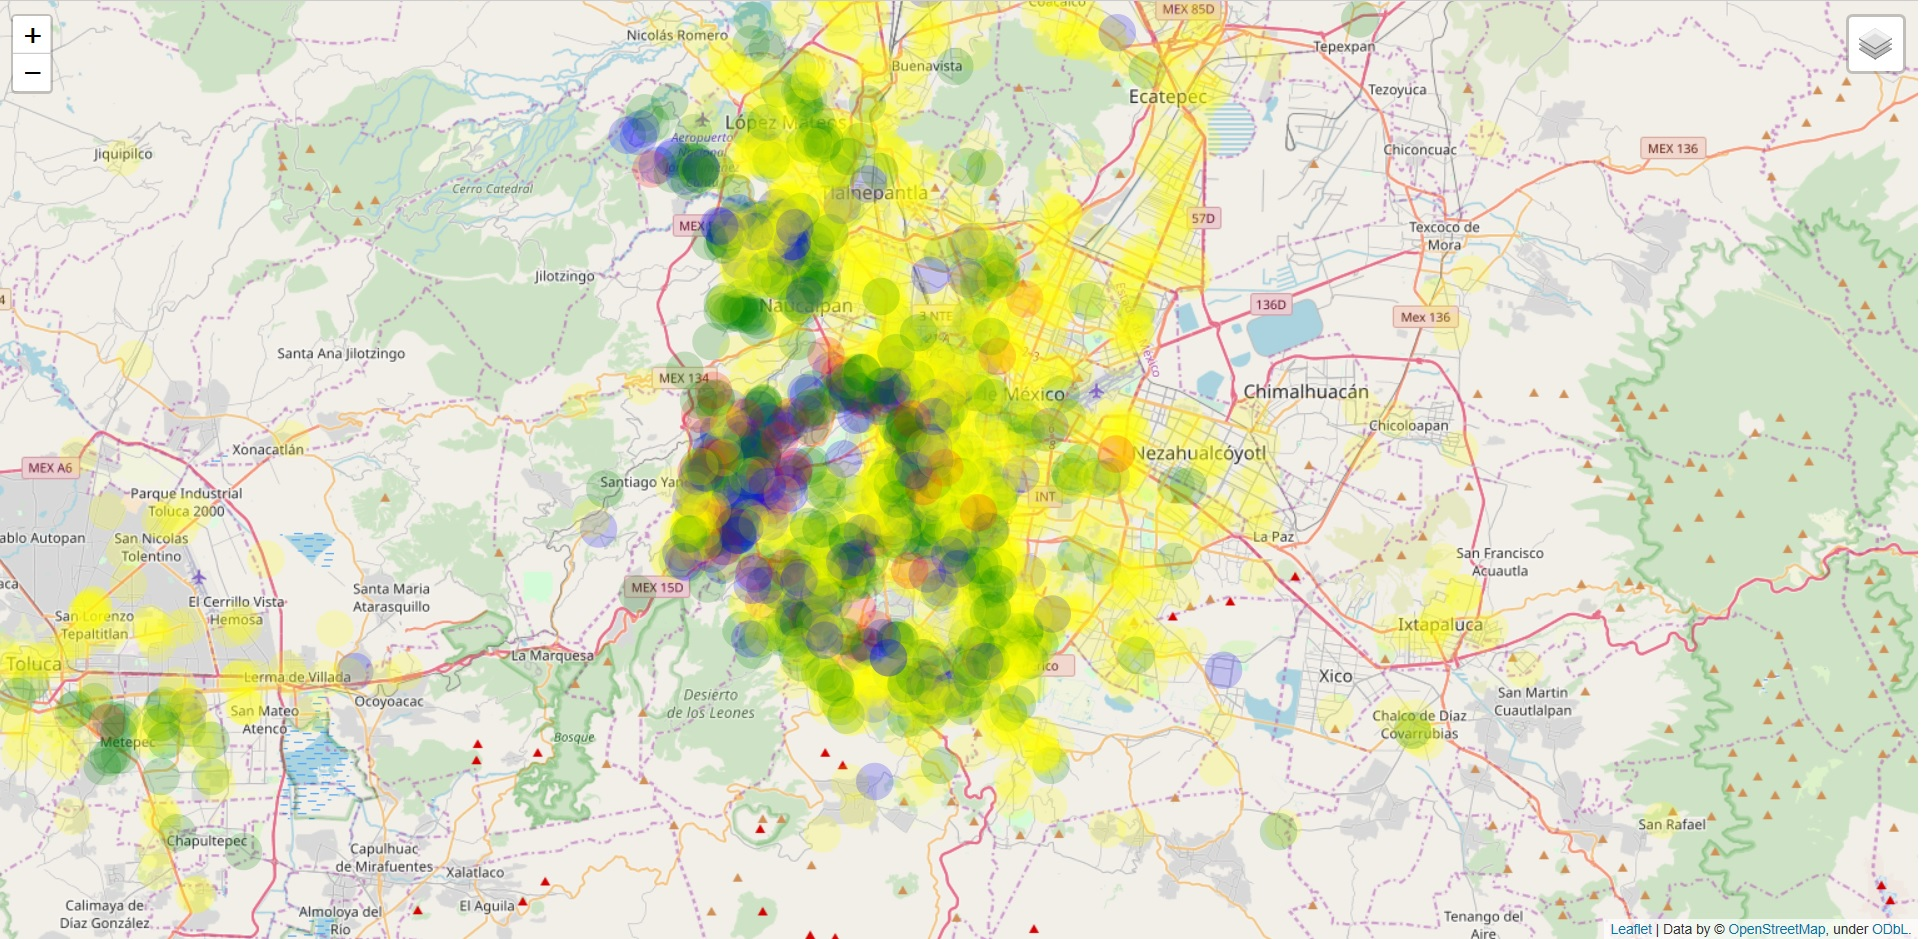

In [200]:
Image(filename = "img/mapa1.jpg")

In [ ]:
m = folium.Map(location=[20, -102], zoom_start=5)
 
# Add the color for the choropleth:
folium.LayerControl().add_to(m)

dftmp =df.dropna(subset=['lat', 'lng'])
dftmp2 = dftmp.sample(frac=0.05).copy()
dftmp2['marker_color'] = pd.cut(dftmp2['precio'], bins=4, labels=['yellow', 'green', 'blue', 'red'])

dftmp = df.groupby('ciudad').agg({'precio_norm': 'mean'})\
    .sort_values('precio_norm', ascending=False)

for index, row in dftmp2.iterrows():
    folium.CircleMarker(
        location=[row.lat, row.lng],
        radius=15,
        popup='Laurelhurst Park',
        color='clear',
        fill=True,
        fill_color=row.marker_color,
        fill_opacity=0.2
    ).add_to(m)


# Guardar como html
m.save('out.html')
folium.LayerControl().add_to(m)
m

In [151]:
# Import libraries
import folium
 
# Carga de la forma de la zona (Mexico)
#state_geo = os.path.join('datos/custom.geo.json')
 
# Carga de datos de precios de propiedades
#state_unemployment = os.path.join('datos/train.csv')
#state_data = pd.read_csv(state_unemployment)
 
# Inicializar el mapa:
m = folium.Map(location=[20, -102], zoom_start=5)
 
# Add the color for the choropleth:
folium.Choropleth(
 geo_data="datos/mexico.json",
 name='choropleth',
 data="",
 columns=['provincia', 'precio'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
).add_to(m)
folium.LayerControl().add_to(m)
 
# Guardar como html
#m.save('#292_folium_choropleth_MX1.html')
folium.LayerControl().add_to(m)
m

In [149]:
df_mexico = pd.read_csv("datos/mexico.csv", index_col=0)

#df_mexico = df_mexico[df_mexico.country == 'Mexico']
#df_mexico = df_mexico[['lat', 'lng']]
#df_mexico.to_csv(r'mexicoc.csv')


In [119]:
m.save('out.html')

In [54]:
#df['ldesc'] = df['descripcion'].apply(len)
df2 = df
df2['desc_len'] = df['descripcion'].map(str).apply(len)
#print(df['ldesc'].sort_values(ascending=False)[:5],'\n')
#len(df2.iloc(0)[0])
df2.head()

titulo  \
id                                                          
254099                                  depto. tipo a-402   
53461                      condominio horizontal en venta   
247984              casa en venta urbi 3 recamaras tonala   
209067  casa sola en toluca zinacantepec con credito i...   
185997                                     paseos del sol   

                                              descripcion     tipodepropiedad  \
id                                                                              
254099  depto. interior de 80.15m2, consta de sala com...         Apartamento   
53461   <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
247984  descripcion \nla mejor ubicacion residencial e...                Casa   
209067  casa en privada con caseta de vigilancia casas...                Casa   
185997  bonito departamento en excelentes condiciones ...         Apartamento   

                              direccion                  ciudad  \
id                                                                
254099  Avenida Division del Norte 2005           Benito Juárez   
53461                        AV. MEXICO  La Magdalena Contreras   
247984                      Urbi Tonala                  Tonalá   
209067    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
185997                  PASEOS DEL SOL                  Zapopan   

               provincia  antiguedad  habitaciones  garages  banos  \
id                                                                   
254099  Distrito Federal         nan          2.00     1.00   2.00   
53461   Distrito Federal       10.00          3.00     2.00   2.00   
247984           Jalisco        5.00          3.00     2.00   2.00   
209067    Edo. de México        1.00          2.00     1.00   1.00   
185997           Jalisco       10.00          2.00     1.00   1.00   

        metroscubiertos  metrostotales   idzona   lat    lng      fecha  \
id                                                                        
254099            80.00          80.00 23533.00   nan    nan 2015-08-23   
53461            268.00         180.00 24514.00 19.31 -99.23 2013-06-28   
247984           144.00         166.00 48551.00   nan    nan 2015-10-17   
209067            63.00          67.00 53666.00 19.30 -99.69 2012-03-09   
185997            95.00          95.00 47835.00   nan    nan 2016-06-07   

        gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                           
254099      0.00           0.00     0.00              0.00   
53461       0.00           0.00     0.00              1.00   
247984      0.00           0.00     0.00              0.00   
209067      0.00           0.00     0.00              1.00   
185997      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  precio_norm  desc_len  
id                                                                    
254099                        0.00 2273000.00        14.64       171  
53461                         1.00 3600000.00        15.10       716  
247984                        0.00 1200000.00        14.00      1340  
209067                        1.00  650000.00        13.38       357  
185997                        0.00 1150000.00        13.96       103

Total tipos de propiedad: 2951


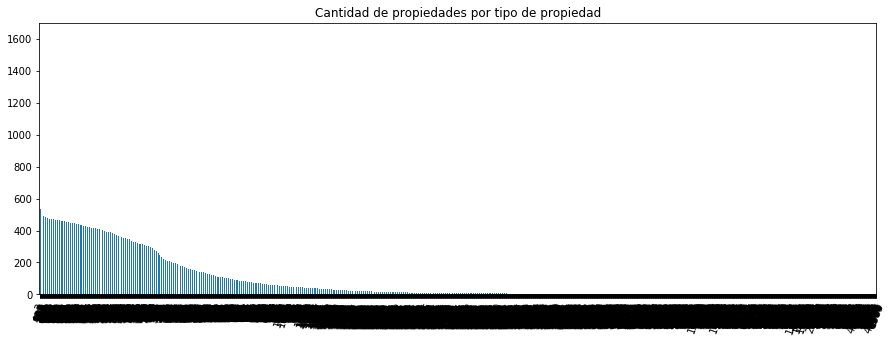

In [56]:
#print(df2['desc_len'].sort_values(ascending=False)[:5],'\n')
print(f"Total tipos de propiedad: {df2.desc_len.nunique()}")
df2.desc_len.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");

## Tipos de propiedad

Tipos de propiedad y precio promedio por tipo de propiedad

In [9]:
print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");

Total tipos de propiedad: 24


In [10]:
# Precio promedio por tipo de propiedad
#df.groupby('tipodepropiedad').agg({'precio': 'mean'})\
#    .sort_values('precio', ascending=False)\
#    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por tipo de propiedad");

## Provincias

Total de provincias: 32


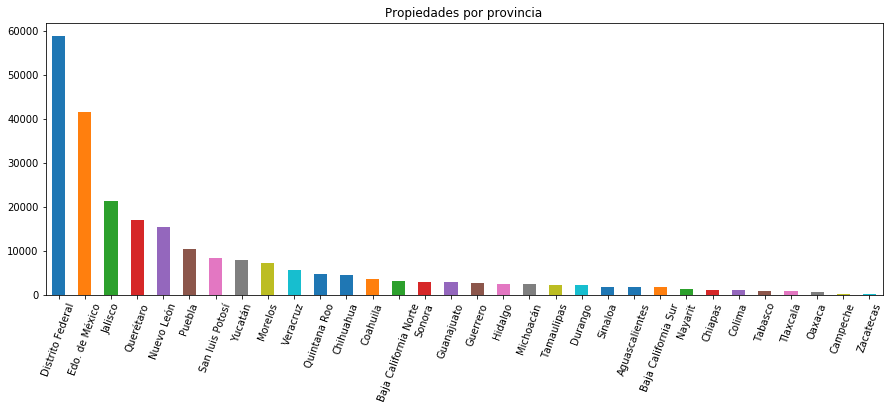

In [11]:
print(f"Total de provincias: {df.provincia.nunique()}")
df.provincia.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, title="Propiedades por provincia");

## Precio por provincia

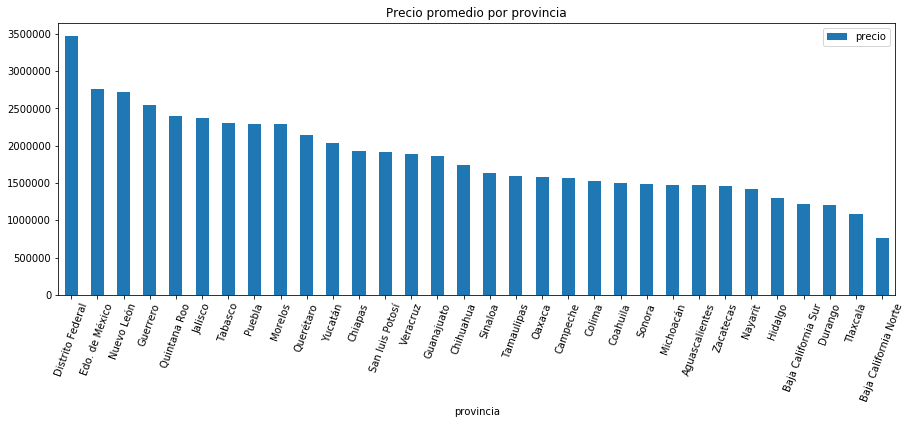

In [12]:
df.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por provincia");

In [13]:
print(f"Total de ciudades: {df.ciudad.nunique()}")
df.ciudad.value_counts().head(10)

Total de ciudades: 875


Querétaro              12646
Benito Juárez          11014
Zapopan                10360
San Luis Potosí         7925
Mérida                  7162
Monterrey               6946
Alvaro Obregón          6633
Cuauhtémoc              6614
Naucalpan de Juárez     6554
Miguel Hidalgo          5795
Name: ciudad, dtype: int64

## Correlaciones

Dos variables se correlacionan positivamente si cuando una crece, la otra crece también y se correlacionan negativamente si cuando una crece, la otra decrece. En realidad, la relación es más débil: se correlacionan si, al aumentar una, la otra *tiende* a aumentar, en general. 

Como ahora vamos a ver, el precio y los metros cubiertos se correlacionan positivamente (lo que significa que las propiedades más grandes tienden a ser más caras que las más chicas...)


*NB: Correlación no implica causalidad*.

In [14]:
# Agrego dos columnas calculadas a partir de la fecha (timestamp y 201602,...)
df['ts'] = df.fecha.astype(int)
df['anio_mes'] = df['fecha'].map(lambda x: 100 * x.year + x.month)

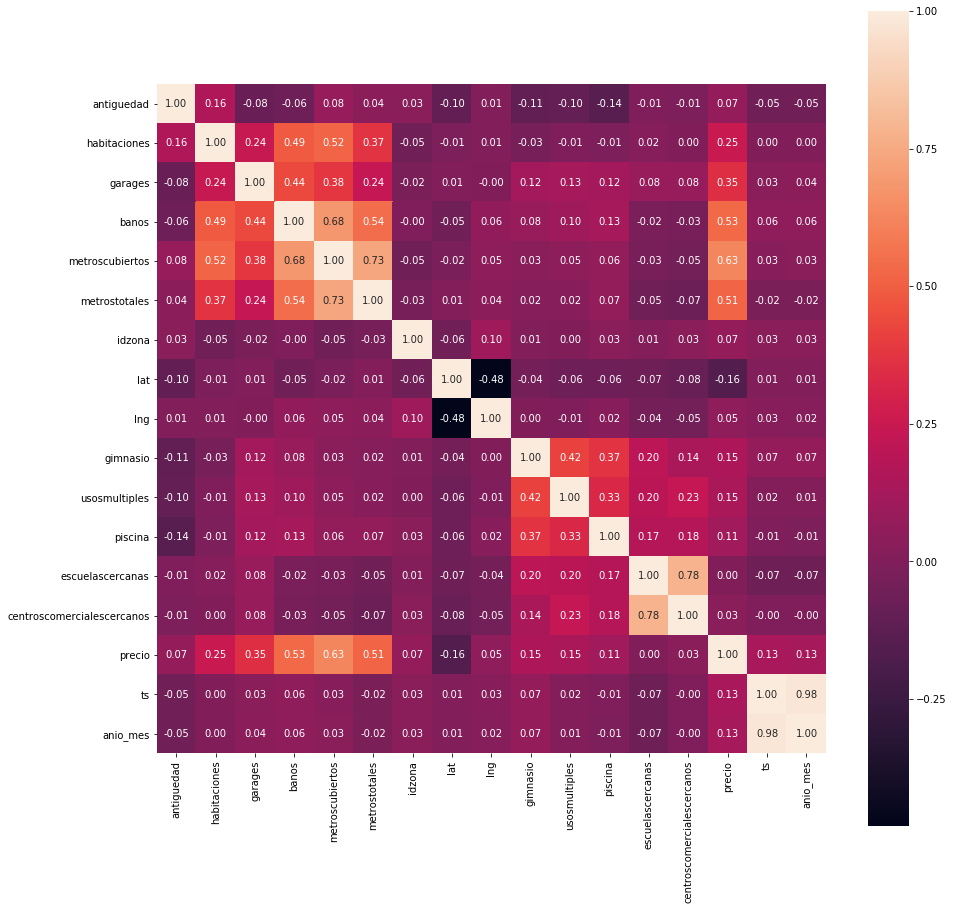

In [15]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f');

In [16]:
# Inflación mexicana
plt.figure(figsize=(15, 6))
sns.boxplot(x=df.fecha.dt.year, y='precio', data=df, palette='Blues')
plt.title("Aumento de precios por año");

In [17]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);

In [18]:
# Distribución de metros cubiertos
# _, axes = plt.subplots(1, 2, figsize=(15, 5))
# plt.ticklabel_format(style = 'plain')
# df[column].hist(bins=40, ax=axes[0], color='orange');
# df[column].plot(kind='box', ax=axes[1]);

---

# Modelos baseline

In [19]:
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## Métrica: Root Mean Squared Logarithmic Error
$
\huge
\begin{align}
RMSLE = \sqrt{\frac{\sum((log(\text{actual}+1) - log(\text{pred}+1))^2}{n}}
\end{align}
$

In [20]:
# Métrica de evaluación
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

#### Intuición detrás de RMSLE

La razón para usar error logarítmico es que relativiza el error al valor absoluto considerado. Por ejemplo, consideremos un error absoluto de 1000 sobre un valor absoluto de 10 y uno de 100.000:

In [22]:
actual_1 = 10
actual_2 = 1000000
error = 1000

abs_error_1 = np.abs(actual_1 - (actual_1 + error))
abs_error_2 = np.abs(actual_2 - (actual_2 + error))

log_error_1 = np.abs(np.log(actual_1 + 1) - np.log(actual_1 + error + 1))
log_error_2 = np.abs(np.log(actual_2 + 1) - np.log(actual_2 + error + 1))

print(f"Error relativo grande - Abs: {abs_error_1:.4f}, Log:{log_error_1:.4f}")
print(f"Error relativo chico  - Abs: {abs_error_2:.4f}, Log:{log_error_2:.4f}")

Error relativo grande - Abs: 1000.0000, Log:4.5208
Error relativo chico  - Abs: 1000.0000, Log:0.0010


## Baseline 1: [DummyRegressor](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

Un DummyRegressor(strategy='mean') predice el precio promedio del train set (como constante), no es verdaderamente útil, pero sirve como baseline para darse una idea del bottom-line de valores de predicción

### Preprocesamiento

In [23]:
# Tiramos todas las columnas no numéricas para que sklearn nos acepte el dataframe. 
# Igualmente, el DummyRegressor no va a utilizar ninguna más que el precio 
drop_cols = ['fecha', 'ciudad', 'idzona', 'tipodepropiedad', 'provincia', 'titulo', 'descripcion', 'direccion']
X = df.drop(['precio'] + drop_cols, axis=1)
y = df['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y={y_test.shape}")

Train shapes: X=(180000, 15) y=(180000,)
Test  shapes: X=(60000, 15)  y=(60000,)


### Modelo

In [25]:
dummy = DummyRegressor(strategy='mean').fit(X_train, y_train)
pred = dummy.predict(X_test)

In [26]:
print(f"Promedio de precios del train set: {y_train.mean()}")
print(f"Primeras 3 predicciones: {pred[:3]}")

Promedio de precios del train set: 2536913.142061111
Primeras 3 predicciones: [2536913.14206111 2536913.14206111 2536913.14206111]


In [27]:
dummy_rmsle = RMSLE(y_test, pred)
dummy_rmsle_train = RMSLE(y_train, dummy.predict(X_train))
print(f"RMSLE DummyRegressor (train): {dummy_rmsle_train:.5f}")
print(f"RMSLE DummyRegressor: {dummy_rmsle:.5f}")

RMSLE DummyRegressor (train): 0.90228
RMSLE DummyRegressor: 0.90318


#### RMSLE no tiene cota superior, asi que 0.903 no es tan malo

In [29]:
rmsle_1 = RMSLE(y_test, np.array([1 for _ in range(len(y_test))]))
rmsle_inf = RMSLE(y_test, np.array([9999999999999999999 for _ in range(len(y_test))]))
print(f"Si predijesemos todo 1 el RMSLE sería: {rmsle_1:.4f}")
print(f"Si predijesemos un valor altísimo, sería: {rmsle_inf:.4f}")

Si predijesemos todo 1 el RMSLE sería: 13.7364
Si predijesemos un valor altísimo, sería: 29.3569


## Baseline 2: Regresión lineal sobre metros cubiertos

### Preprocesamiento

In [30]:
X = df[['metroscubiertos']]
y = df['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y={y_test.shape}")

Train shapes: X=(180000, 1) y=(180000,)
Test  shapes: X=(60000, 1)  y=(60000,)


#### Imputación de nulls
Un [Imputer](http://scikit-learn.org/stable/modules/preprocessing.html#imputation) ("imputador") es una manera de rellenar los nulls  un poco más sofisticada que reemplazarlos por 0 o por -1 (o tirarlos).

En este caso, reemplazamos los nulls por el valor promedio de las muestras existentes, pero podríamos reemplazarlos por otro valor (la moda, la mediana, etc).

Acá imputamos los metros cubiertos.

**OJO!** Al tomar el promedio (`fittear`) hay que hacerlo sobre el train set, sino estaríamos leakeando información!

In [31]:
imp = Imputer()
X_train['metroscubiertos'] = imp.fit_transform(X_train[['metroscubiertos']])
X_test['metroscubiertos'] = imp.transform(X_test[['metroscubiertos']])

In [33]:
X_test.isnull().sum()

metroscubiertos    0
dtype: int64

### Modelo

In [34]:
linear_model = LinearRegression().fit(X_train, y_train)
pred = linear_model.predict(X_test)

In [37]:
# El modelo de regresion lineal con una variable obtiene RMSLE=0.65
linear_rmsle_train = RMSLE(y_train, linear_model.predict(X_train))
linear_rmsle = RMSLE(y_test, pred)
print(f"RMSLE LinearRegression (train): {linear_rmsle_train:.5f}")
print(f"RMSLE LinearRegression: {linear_rmsle:.5f}")

RMSLE LinearRegression (train): 0.65673
RMSLE LinearRegression: 0.65657


## Baseline 3: Árbol de decisión sobre varios features

### Preprocesamiento

In [39]:
# Droppeamos strings y columnas complejas y repetidas
drop_cols = ['titulo', 'descripcion', 'direccion', 'lat', 'lng', 'fecha', 'ts', 'idzona']
df2 = df.drop(drop_cols, axis=1).copy()
print(f"Columnas ({len(df2.columns)}): {df2.columns.tolist()}")
df2.head()

Columnas (16): ['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio', 'anio_mes']


tipodepropiedad                  ciudad         provincia  \
id                                                                     
254099         Apartamento           Benito Juárez  Distrito Federal   
53461   Casa en condominio  La Magdalena Contreras  Distrito Federal   
247984                Casa                  Tonalá           Jalisco   
209067                Casa            Zinacantepec    Edo. de México   
185997         Apartamento                 Zapopan           Jalisco   

        antiguedad  habitaciones  garages  banos  metroscubiertos  \
id                                                                  
254099         nan          2.00     1.00   2.00            80.00   
53461        10.00          3.00     2.00   2.00           268.00   
247984        5.00          3.00     2.00   2.00           144.00   
209067        1.00          2.00     1.00   1.00            63.00   
185997       10.00          2.00     1.00   1.00            95.00   

        metrostotales  gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                                          
254099          80.00      0.00           0.00     0.00              0.00   
53461          180.00      0.00           0.00     0.00              1.00   
247984         166.00      0.00           0.00     0.00              0.00   
209067          67.00      0.00           0.00     0.00              1.00   
185997          95.00      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  anio_mes  
id                                                       
254099                        0.00 2273000.00    201508  
53461                         1.00 3600000.00    201306  
247984                        0.00 1200000.00    201510  
209067                        1.00  650000.00    201203  
185997                        0.00 1150000.00    201606

#### Observamos nulls y de features categóricos

In [40]:
display(df2.isnull().sum())
numeric_columns_with_nulls = list(set(df2.columns[df2.isnull().sum() > 0].tolist()) \
                                  - set(['tipodepropiedad', 'ciudad', 'provincia']))
print(numeric_columns_with_nulls)

tipodepropiedad                  46
ciudad                          372
provincia                       155
antiguedad                    43555
habitaciones                  22471
garages                       37765
banos                         26221
metroscubiertos               17400
metrostotales                 51467
gimnasio                          0
usosmultiples                     0
piscina                           0
escuelascercanas                  0
centroscomercialescercanos        0
precio                            0
anio_mes                          0
dtype: int64

['habitaciones', 'garages', 'antiguedad', 'metroscubiertos', 'metrostotales', 'banos']


#### One-hot-encodeamos los categóricos [`tipodepropiedad`, `ciudad` y `provincia`] sobre todo el dataset

In [42]:
# Con dummy_na=True, creamos la categoria "Es nulo" como una coordenada más de los one-hot vectors
# Comentar: ¿Hay leaks acá? ¿Sí / No? ¿Por qué?
df2 = pd.get_dummies(df2, dummy_na=True)
print(f"Cantidad de columnas después del one-hot-encoding: {len(df2.columns)}")
df2.head()

Cantidad de columnas después del one-hot-encoding: 947


antiguedad  habitaciones  garages  banos  metroscubiertos  \
id                                                                  
254099         nan          2.00     1.00   2.00            80.00   
53461        10.00          3.00     2.00   2.00           268.00   
247984        5.00          3.00     2.00   2.00           144.00   
209067        1.00          2.00     1.00   1.00            63.00   
185997       10.00          2.00     1.00   1.00            95.00   

        metrostotales  gimnasio  usosmultiples  piscina  escuelascercanas  \
id                                                                          
254099          80.00      0.00           0.00     0.00              0.00   
53461          180.00      0.00           0.00     0.00              1.00   
247984         166.00      0.00           0.00     0.00              0.00   
209067          67.00      0.00           0.00     0.00              1.00   
185997          95.00      0.00           0.00     0.00              0.00   

        centroscomercialescercanos     precio  anio_mes  \
id                                                        
254099                        0.00 2273000.00    201508   
53461                         1.00 3600000.00    201306   
247984                        0.00 1200000.00    201510   
209067                        1.00  650000.00    201203   
185997                        0.00 1150000.00    201606   

        tipodepropiedad_Apartamento  tipodepropiedad_Bodega comercial  \
id                                                                      
254099                            1                                 0   
53461                             0                                 0   
247984                            0                                 0   
209067                            0                                 0   
185997                            1                                 0   

        tipodepropiedad_Casa  tipodepropiedad_Casa en condominio  \
id                                                                 
254099                     0                                   0   
53461                      0                                   1   
247984                     1                                   0   
209067                     1                                   0   
185997                     0                                   0   

        tipodepropiedad_Casa uso de suelo  \
id                                          
254099                                  0   
53461                                   0   
247984                                  0   
209067                                  0   
185997                                  0   

        tipodepropiedad_Departamento Compartido  tipodepropiedad_Duplex  \
id                                                                        
254099                                        0                       0   
53461                                         0                       0   
247984                                        0                       0   
209067                                        0                       0   
185997                                        0                       0   

        tipodepropiedad_Edificio  tipodepropiedad_Garage  \
id                                                         
254099                         0                       0   
53461                          0                       0   
247984                         0                       0   
209067                         0                       0   
185997                         0                       0   

        tipodepropiedad_Hospedaje  tipodepropiedad_Huerta  \
id                                                          
254099                          0                       0   
53461                           0                       0   
247984                          0                       0   
209067       

##### Ejemplo de one-hot-encoding (pasar categóricos a `dummies`)

In [46]:
one_hot_encoding_example_df = pd.DataFrame(['red', 'red', 'green', 'blue', np.nan], columns=['color'])
display(one_hot_encoding_example_df)
display(pd.get_dummies(one_hot_encoding_example_df))
display(pd.get_dummies(one_hot_encoding_example_df, dummy_na=True))

color
0    red
1    red
2  green
3   blue
4    NaN

color_blue  color_green  color_red
0           0            0          1
1           0            0          1
2           0            1          0
3           1            0          0
4           0            0          0

color_blue  color_green  color_red  color_nan
0           0            0          1          0
1           0            0          1          0
2           0            1          0          0
3           1            0          0          0
4           0            0          0          1

Más sobre one-hot-encoding [acá](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

#### Imputación de nulls numéricos

In [43]:
# Para los nulls numéricos, usar un Imputer con strategy mean (reemplazamos los NaN por el promedio)
# Para no leakear, spliteamos el dataset antes
X2 = df2.drop("precio", axis=1)
y2 = df2['precio']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=1)

In [44]:
for c in numeric_columns_with_nulls:
    imp = Imputer()
    X2_train[c] = imp.fit_transform(X2_train[[c]])
    X2_test[c] = imp.transform(X2_test[[c]])

In [45]:
X2_train.isnull().sum().sum()

0

In [46]:
X2_test.isnull().sum().sum()

0

### Modelo

In [48]:
tree = DecisionTreeRegressor().fit(X2_train, y2_train)
tree_pred = tree.predict(X2_test)

In [49]:
tree_rmsle = RMSLE(y2_test, tree_pred)
tree_rmsle_train = RMSLE(y2_train, tree.predict(X2_train))
print(f"RMSLE DecisionTreeRegressor (train): {tree_rmsle_train:.5f}")
print(f"RMSLE DecisionTreeRegressor: {tree_rmsle:.5f}")

RMSLE DecisionTreeRegressor (train): 0.01698
RMSLE DecisionTreeRegressor: 0.46040


In [50]:
print(f"RMSLE DummyRegressor       : {dummy_rmsle:.5f}")
print(f"RMSLE LinearRegressor      : {linear_rmsle:.5f}")
print(f"RMSLE DecisionTreeRegressor: {tree_rmsle:.5f}")

RMSLE DummyRegressor       : 0.90318
RMSLE LinearRegressor      : 0.65657
RMSLE DecisionTreeRegressor: 0.46040


# LinearRegressor para submit
El mismo proceso pero con el archivo test.csv en lugar de haciendo train/test split para que tengan el código disponible para generar un submit

In [56]:
df_train = pd.read_csv("data/train.csv", index_col=0)
df_submit = pd.read_csv("data/test.csv", index_col=0)

# Imputamos los NaNs
imp = Imputer()
df_train['metroscubiertos'] = imp.fit_transform(df_train[['metroscubiertos']])
df_submit['metroscubiertos'] = imp.transform(df_submit[['metroscubiertos']])

linear_pred = LinearRegression()\
                    .fit(df_train[['metroscubiertos']], df_train['precio'])\
                    .predict(df_submit[['metroscubiertos']])

res = pd.DataFrame(linear_pred, index=df_submit.index, columns=['precio'])
display(res.head())
res.to_csv("data/workshop-submission-linear.csv", header=False) # RMSLE=0.65487

precio
id               
4941   4200756.25
51775  1112322.29
115253 1377423.92
299321 1364168.84
173570 1284638.35

# Eso es todo. ¡Suerte en la competencia!

## Links relevantes

* [Competencia](https://metadata.fundacionsadosky.org.ar/competition/4/)
* Consultas: [eci2018@navent.com](mailto:eci2018@navent.com)


## Referencias
* [Diferencia entre RMSE y RMSLE (quora)](https://www.quora.com/What-is-the-difference-between-an-RMSE-and-RMSLE-logarithmic-error-and-does-a-high-RMSE-imply-low-RMSLE)
* [Imputer (sklearn user guide)](http://scikit-learn.org/stable/modules/preprocessing.html#imputation)
* [DummyRegressor (sklearn user guide)](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)
* [One-hot-encoding (kernel en Kaggle)](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)
* [Seaborn](https://seaborn.pydata.org/introduction.html)